## CARGA  DE DATOS

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import scipy.stats as st
from functions import *
from graphics import *
from statistics_tests import *
import pandas as pd

df_final_demo = get_final_demo_df()

df_web_data_concat = get_web_data_df()

df_final_exp = get_final_exp_df()

df_all = get_df_all()

LIMPIEZA DE DATOS

In [24]:
df_all = df_all.drop("clnt_tenure_yr", axis=1)      # We don´t need this column because is derivative from clnt_tenure_mnth

QUITAMOS OUTLIERS DEL DF_ALL Y DEL QUE NO TIENE DUPLICADOS

In [25]:
df_all = outlier_slayer(df_all)

In [26]:
# df_all["time_diff"] = df_all.groupby(["client_id", "visit_id"])["date_time"].shift(1) - df_all["date_time"]

In [27]:
df_all["time_diff"] = abs(df_all.groupby(["client_id", "visit_id"])["date_time"].diff().shift(-1).fillna(pd.Timedelta(seconds=0)) ).dt.total_seconds()

In [28]:
df_inter = df_all.copy()
df_inter.drop_duplicates(subset=["visit_id", "process_step"], keep="last", inplace=True)

In [29]:
df_all["time_diff_cleaned"] = abs(df_inter.groupby(["client_id", "visit_id"])["date_time"].diff().shift(-1).fillna(pd.Timedelta(seconds=0)) ).dt.total_seconds()

In [30]:
df_all["repetition"] = df_all.duplicated(subset=["visit_id", "process_step"], keep="last").astype(int)          #0 = no, 1 = yes

In [31]:
df_all["last_step"] = df_all.groupby("visit_id")["process_step"].transform("max")

## STATISTICS

Estadísticas descriptivas de variables numéricas:
       clnt_tenure_mnth       clnt_age  num_accts            bal  \
count     220371.000000  220371.000000   220371.0  220371.000000   
mean         138.750130      47.234768        2.0   70711.380375   
std           69.661674      15.478345        0.0   47861.651689   
min           33.000000      17.000000        2.0   23789.440000   
25%           79.000000      33.500000        2.0   35629.360000   
50%          124.000000      48.000000        2.0   52944.990000   
75%          182.000000      59.500000        2.0   89166.280000   
max          359.000000      96.000000        2.0  238345.160000   

        calls_6_mnth  logons_6_mnth  
count  220371.000000  220371.000000  
mean        2.827455       5.859737  
std         2.161419       2.150534  
min         0.000000       3.000000  
25%         1.000000       4.000000  
50%         2.000000       6.000000  
75%         5.000000       8.000000  
max         6.000000       9.0000

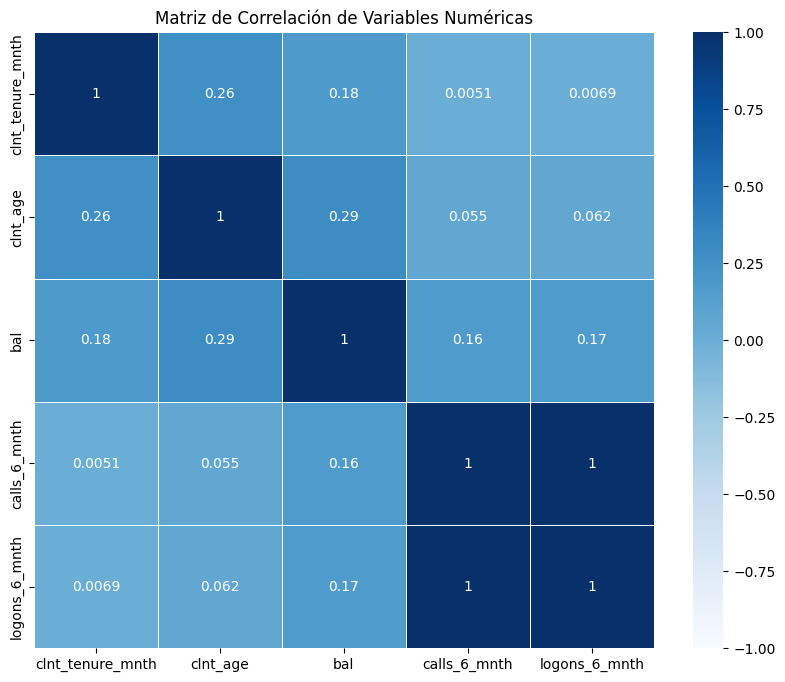

In [11]:
analyze_numeric_variables(df_all)

## Hipótesis del Experimento



**Objetivo del Experimento:**  
El objetivo del experimento es determinar si una nueva interfaz de usuario (UI) más moderna e intuitiva, junto con mensajes y sugerencias contextuales, mejora las tasas de finalización del proceso en comparación con la interfaz tradicional de Vanguard.

**Hipótesis Nula (H0):**  
No existe una diferencia significativa en la tasa de finalización del proceso entre los clientes que usan la interfaz tradicional (Control Group) y los que usan la nueva interfaz mejorada (Test Group).

**Hipótesis Alternativa (H1):**  
Existe una diferencia significativa en la tasa de finalización del proceso entre los clientes que usan la interfaz tradicional (Control Group) y los que usan la nueva interfaz mejorada (Test Group). Específicamente, se espera que la nueva interfaz incremente la tasa de finalización.

**Nivel de Significancia:**  
α = 0.05

**Prueba Estadística:**  
* Test de Chi-cuadrado: Para evaluar la diferencia en las tasas de finalización entre los dos grupos.  
* Z-test de dos proporciones: Para comparar las tasas de finalización entre el grupo de control y el grupo de prueba.

**Interpretación de los Resultados:**  
* Si el p-valor resultante de las pruebas estadísticas es menor que el nivel de significancia (α = 0.05), rechazamos la hipótesis nula (H0) y aceptamos la hipótesis alternativa (H1), concluyendo que la nueva interfaz mejora significativamente la tasa de finalización del proceso.
* Si el p-valor es mayor que 0.05, no podemos rechazar la hipótesis nula, y concluimos que no hay suficiente evidencia para afirmar que la nueva interfaz mejora la tasa de finalización.


In [12]:
#Estádistica que compara la tasa de conversión de ambos portales
control_test_rate(df_all)

(0.12037508918560799, 0.13805710733594523)

In [13]:
get_z_test_values(df_all, hypothesis='two-sided')  # Cambia 'two-sided' según tu hipótesis, hypothesis='larger', hypothesis='smaller'

Tasa de completación del grupo de control: 12.04%
Tasa de completación del grupo de test: 13.81%
Estadístico Z: -12.2592
P-valor: 1.5001697603176535e-34
Podemos afirmar con un 95% de confianza que la diferencia en la tasa de completación es estadísticamente significativa (rechazamos H0).


In [14]:
umbral_aumento(df_all)

El aumento observado es de 14.69%, cumpliendo con el umbral del 5%.


In [15]:
#Explicar un poquito en markdown
chi_cuadrado_test_dos(df_all)

Chi-cuadrado: 150.1313
P-valor: 1.6227890335286358e-34
La diferencia en la tasa de completación es estadísticamente significativa (rechazamos H0).


## Resultados del Experimento



**Tasa de Completación del Grupo de Control:**  
12.04%

**Tasa de Completación del Grupo de Test:**  
13.81%

---

### Prueba Z (Test de Dos Proporciones)
- **Resultado del Test Z:**  
  - **Estadístico Z:** -12.2592  
  - **P-valor:** 1.50e-34  
  - **Conclusión:** Podemos afirmar con un 95% de confianza que la diferencia en la tasa de completación es estadísticamente significativa (rechazamos H0).

---

### Umbral de Aumento Relativo
- **Aumento Observado:**  
  El aumento observado es de 14.69%, cumpliendo con el umbral del 5%.

---

### Test de Chi-Cuadrado
- **Chi-cuadrado:** 150.1313  
- **P-valor:** 1.62e-34  
- **Conclusión:** La diferencia en la tasa de completación es estadísticamente significativa (rechazamos H0).

---

### Interpretación General
Los resultados de las pruebas estadísticas (Test Z y Chi-Cuadrado) confirman que la nueva interfaz de usuario tiene un impacto positivo y significativo en la tasa de completación del proceso en comparación con la interfaz tradicional. Además, el aumento relativo en la tasa de completación del grupo de prueba supera el umbral del 5%, lo que indica que la nueva interfaz no solo mejora la experiencia del usuario, sino que también contribuye a una mayor efectividad en la completación del proceso.
